# CryptoHack General Challenges

# Encoding

## ASCII

ASCII is a 7-bit encoding standard which allows the representation of text using the integers 0-127.

Using the below integer array, convert the numbers to their corresponding ASCII characters to obtain a flag.

[99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]

We can use python's builtin `chr` function to solve this challenge. Return the string representing a character whose Unicode code point is the integer i. For example, `chr(97)` returns the string 'a', while `chr(8364)` returns the string '€'.

In [67]:
chr(99)

'c'

In [68]:
flag=[99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]

In [69]:
crypto_flag=[chr(item) for item in flag]

In [70]:
crypto_flag

['c',
 'r',
 'y',
 'p',
 't',
 'o',
 '{',
 'A',
 'S',
 'C',
 'I',
 'I',
 '_',
 'p',
 'r',
 '1',
 'n',
 't',
 '4',
 'b',
 'l',
 '3',
 '}']

In [71]:
crypto_flag=''.join(x for x in crypto_flag)
print(crypto_flag)

crypto{ASCII_pr1nt4bl3}


On to the next challenge!

## Hex

When we encrypt something the resulting ciphertext commonly has bytes which are not printable ASCII characters. If we want to share our encrypted data, it's common to encode it into something more user-friendly and portable across different systems.

Included below is a flag encoded as a hex string. Decode this back into bytes to get the flag.

63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d

We can use the following `python3` code to convert from hex to ASCII.

Check out the `bytearray` object in the python documentaion. Here we use the `fromhex` and `decode` methods.

https://docs.python.org/3/library/stdtypes.html#bytearray

In [72]:
bytearray.fromhex("7061756c").decode()

'paul'

In [73]:
hex_string='63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d'

In [74]:
print(bytearray.fromhex(hex_string).decode())

crypto{You_will_be_working_with_hex_strings_a_lot}


On to the next problem!

## Base64

Another common encoding scheme is Base64, which allows us to represent binary data as an ASCII string using 64 characters. One character of a Base64 string encodes 6 bits, and so 4 characters of Base64 encodes three 8-bit bytes.

Base64 is most commonly used online, where binary data such as images can be easy included into html or css files.

Take the below hex string, decode it into bytes and then encode it into Base64.

`72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf`

We will use the `base64` package.

Consider the following example from https://stackabuse.com/encoding-and-decoding-base64-strings-in-python/

In [75]:
import base64

message = "Python is fun"
message_bytes = message.encode('ascii')
base64_bytes = base64.b64encode(message_bytes)
base64_message = base64_bytes.decode('ascii')

print(base64_message)

UHl0aG9uIGlzIGZ1bg==


In [76]:
hex_string='72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf'

In [77]:
byte_object=bytearray.fromhex(hex_string)

In [78]:
base64_bytes=base64.b64encode(byte_object)

In [79]:
base64_message = base64_bytes.decode()
print(base64_message)

crypto/Base+64+Encoding+is+Web+Safe/


On to the next problem!

## Bytes and integers

Cryptosystems like RSA works on numbers, but messages are made up of characters. How should we convert our messages into numbers so that mathematical operations can be applied?

The most common way is to take the ordinal bytes of the message, convert them into hexadecimal, and concatenate. This can be interpreted as a base-16 number, and also represented in base-10.

To illustrate:

```
message: HELLO
ascii bytes: [72, 69, 76, 76, 79]
hex bytes: [0x48, 0x45, 0x4c, 0x4c, 0x4f]
base-16: 0x48454c4c4f
base-10: 310400273487
```


Python's PyCryptodome library implements this with the methods `Crypto.Util.number.bytes_to_long` and `Crypto.Util.number.long_to_bytes`.

Convert the following integer back into a message:

`11515195063862318899931685488813747395775516287289682636499965282714637259206269`

In [28]:
from Crypto.Util.number import *

In [81]:
help(Crypto.Util.number)

NameError: name 'Crypto' is not defined

In [82]:
long_to_bytes(11515195063862318899931685488813747395775516287289682636499965282714637259206269)

b'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'

On to the next problem!

## Encoding Challenge

Now you've got the hang of the various encodings you'll be encountering, let's have a look at automating it.

Can you pass all 100 levels to get the flag?

The 13377.py file attached below is the source code for what's running on the server. The pwntools_example.py file provides the start of a solution using the incredibly convenient pwntools library. which you can use if you like. pwntools however is incompatible with Windows, so telnetlib_example.py is also provided.

For more information about connecting to interactive challenges, see the FAQ. Feel free to skip ahead to the cryptography if you aren't in the mood for a coding challenge!

Connect at `nc socket.cryptohack.org 13377`

In [2]:
import telnetlib
import json
import codecs
import base64
from Crypto.Util.number import *

HOST = "socket.cryptohack.org"
PORT = 13377

tn = telnetlib.Telnet(HOST, PORT)

In [4]:
def readline():
    return tn.read_until(b"\n")

def json_recv():
    line = readline()
    return json.loads(line.decode())

def json_send(hsh):
    request = json.dumps(hsh).encode()
    tn.write(request)

In [7]:
def decoder(recieved):
    encoding=received["type"]
    message=received["encoded"]
    encodings=[
    "base64",
    "hex",
    "rot13",
    "bigint",
    "utf-8",
]
    if encoding == "base64":
        base64_message = message
        base64_bytes = base64_message.encode('ascii')
        message_bytes = base64.b64decode(base64_bytes)
        decoded = message_bytes.decode('ascii')
        
    elif encoding == "hex":
        decoded = bytearray.fromhex(message).decode()
    elif encoding == "rot13":
        decoded = codecs.decode(message,'rot_13')
    elif encoding == "bigint":
        decoded = bytearray.fromhex(message[2:]).decode()
    elif encoding == "utf-8":
        decoded=''.join(x for x in [chr(item) for item in message])
        
    
    
    return decoded

In [43]:
HOST = "socket.cryptohack.org"
PORT = 13377

tn = telnetlib.Telnet(HOST, PORT)
received = json_recv()

print("Received type: ")
print(received["type"])
print("Received encoded value: ")
print(received["encoded"])
message=received["encoded"]

Received type: 
hex
Received encoded value: 
646f63756d656e745f70726f6d6f74655f7472617665737469


In [44]:
decoder(received)

'document_promote_travesti'

In [88]:
HOST = "socket.cryptohack.org"
PORT = 13377

tn = telnetlib.Telnet(HOST, PORT)
received={}
while 'flag' not in received:
    received = json_recv()
    if 'flag' in received:
        print(received['flag'])
        break
    else:
        decoded_message=decoder(received)
        
        to_send = {
        "decoded": decoded_message
        }
        json_send(to_send)
    

crypto{3nc0d3_d3c0d3_3nc0d3}


Congrats we finished the Encoding Section! On to the XOR section.

## XOR

## XOR Starter

XOR is a bitwise operator which returns 0 if the bits are the same, and 1 otherwise. In textbooks the XOR operator is denoted by ⊕, but in most challenges and programming languages you will see the caret ^ used instead.

|A|B|Output|
|--|--|--|
|1|1|0|
|1|0|1|
|0|1|1|
|0|0|0|


For longer binary numbers we XOR bit by bit: `0110 ^ 1010 = 1100`. We can XOR integers by first converting the integer from decimal to binary. We can XOR strings by first converting each character to the integer representing the Unicode character.

Given the string "label", XOR each character with the integer 13. Convert these integers back to a string and submit the flag as crypto{new_string}. 

In [89]:
string='label'

In [90]:
ordinals=[ord(x) for x in string]
ordinals

[108, 97, 98, 101, 108]

In [91]:
xors=[x^13 for x in ordinals]
xors

[97, 108, 111, 104, 97]

In [92]:
new_string=''.join(x for x in [chr(y) for y in xors])
new_string

'aloha'

On to the next problem!

## XOR Properties

In the last challenge, you saw how XOR worked at the level of bits. In this one, we're going to cover the properties of the XOR operation and then use them to undo a chain of operations that have encrypted a flag. Gaining an intuition for how this works will help greatly when you come to attacking real cryptosystems later, especially in the block ciphers category.

There are four main properties we should consider when we solve challenges using the XOR operator
```
Commutative: A ⊕ B = B ⊕ A
Associative: A ⊕ (B ⊕ C) = (A ⊕ B) ⊕ C
Identity: A ⊕ 0 = A
Self-Inverse: A ⊕ A = 0 
```

Let's break this down. Commutative means that the order of the XOR operations is not important. Associative means that a chain of operations can be carried out without order (we do not need to worry about brackets). The identity is 0, so XOR with 0 "does nothing", and lastly something XOR'd with itself returns zero.

Let's try this out in action! Below is a series of outputs where three random keys have been XOR'd together and with the flag. Use the above properties to undo the encryption in the final line to obtain the flag.
```
KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
KEY2 ^ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e
KEY2 ^ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1
FLAG ^ KEY1 ^ KEY3 ^ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf 
```
Before you XOR these objects, be sure to decode from hex to bytes. If you have `pwntools` installed, you have a xor function for byte strings: from `pwn import xor`

In [52]:
KEY1 = b'a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313'
KEY12='37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e'
KEY23='c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1'
FKEY132='04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf'

To convert the above hex strings to integers so we can apply the `xor ^` operator, just use `int('hexstring',16)`. The result then follows from the above rules from the xor operator.

In [50]:
int(KEY1,16)^int(KEY12,16)

233131678106482661238672080114331736309154844705032145066618125

In [53]:
k1=int(KEY1,16)
k12=int(KEY12,16)
k23=int(KEY23,16)
fk132=int(FKEY132,16)

In [56]:
f=fk132^k23^k1

In [57]:
hex(f)

'0x63727970746f7b7830725f69355f61737330633161743176337d'

Now that we have the flag in hex we can just decode it as above.

In [59]:
bytearray.fromhex(hex(f)[2:]).decode()

'crypto{x0r_i5_ass0c1at1v3}'

On to the next problem!

## Favorite Byte

I've hidden my data using XOR with a single byte. Don't forget to decode from hex first.

`73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d`

The desired flag has been XOR'd with a single byte to produce the above code.
```
FLAG ⊕ BYTE = CODE
FLAG = CODE ⊕ BYTE
```
So we need to cycle through possible bytes to see which produces a flag.
A byte is eight bits, i.e. eight 0's or 1's. So they range from `00000000` to `11111111`, or `0` to `255` in decimal.

In [113]:
#The given code converted to an int.
k='73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d'

In [83]:
x=int('73',16)
x

115

In [141]:
long_to_bytes(int('73',16)^16).decode()

'c'

In [105]:
115^99

16

In [106]:
chr(16)

'\x10'

In [134]:
hex_list=[k[i:i+2] for i in range(0,len(k),2)]    

In [135]:
hex_list[:2]

['73', '62']

In [139]:
''.join([y.decode() for y in [long_to_bytes(int(x,16)^16) for x in hex_list]])

'crypto{0x10_15_my_f4v0ur173_by7e}'

Succint solution from CryptoHack

In [188]:
input_str = bytes.fromhex('73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d')

key = input_str[0] ^ ord('c')
print(''.join(chr(c ^ key) for c in input_str))

crypto{0x10_15_my_f4v0ur173_by7e}


In [208]:
bytes.fromhex('73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d')[0]

115

In [210]:
int('73',16)

115

On to the next problem!

## You either know, XOR you don't
I've encrypted the flag with my secret key, you'll never be able to guess it. 

Remember the flag format and how it might help you in this challenge!

`0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104`

The first part of the flag has to be `crypto`. So we convert each character in `crypto` to ordinals and then hex.

In [203]:
crypto_bytes=[ord(y) for y in 'crypto{']
crypto_bytes

[99, 114, 121, 112, 116, 111, 123]

In [245]:
code=bytes.fromhex('0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104')

49

In [234]:
key=[crypto_bytes[i]^code[i] for i in range(len(crypto_bytes))]
print(key)
print([chr(x) for x in key])

[109, 121, 88, 79, 82, 107, 101]
['m', 'y', 'X', 'O', 'R', 'k', 'e']


Our partila key looks like `myXORke`. A good guess is that the next character in our key should be 'y' so that we get `myXORkey`.

Lets XOR 'y' with the 7th byte from our given code.

In [250]:
print(chr(ord('y')^code[7]))
print(ord('y')^code[7])

1
49


So thus far we have found that our flag is `crypto{1...` and the first part of our key is `myXORkey`. To get the rest of the flag we probably just want to cycle through our given code and XOR with `myXORkey`.

In [251]:
key=[ord(x) for x in 'myXORkey']
key

[109, 121, 88, 79, 82, 107, 101, 121]

In [253]:
[chr(key[i]^code[8+i]) for i in range(len(key))]

['f', '_', 'y', '0', 'u', '_', 'K', 'n']

In [273]:
long_key=key*10

In [277]:
flag_list=[chr(long_key[i]^code[i]) for i in range(len(code))]

In [278]:
flag_string=''.join(x for x in flag_list)
flag_string

'crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}'

What a doozy!
On to the next one!

## Lemur XOR

I've hidden two cool images by XOR with the same secret key so you can't see them!

lemur.png

flag.png

In [288]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

lemur=mpimg.imread('OneDrive\\Pictures\\lemur.png')

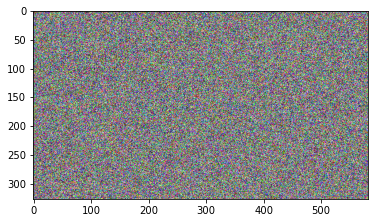

In [296]:
imgplot = plt.imshow(lemur)

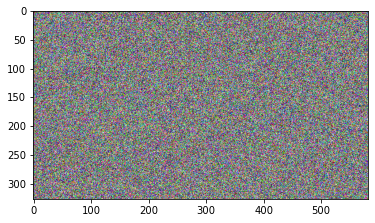

In [297]:
flag=mpimg.imread('OneDrive\\Pictures\\flag.png')
imgplot=plt.imshow(flag)

In [299]:
from PIL import Image, ImageChops
im1 = Image.open('OneDrive\\Pictures\\lemur.png')
im2 = Image.open('OneDrive\\Pictures\\flag.png')

In [302]:
im3 = ImageChops.add(ImageChops.subtract(im2, im1), ImageChops.subtract(im1, im2))

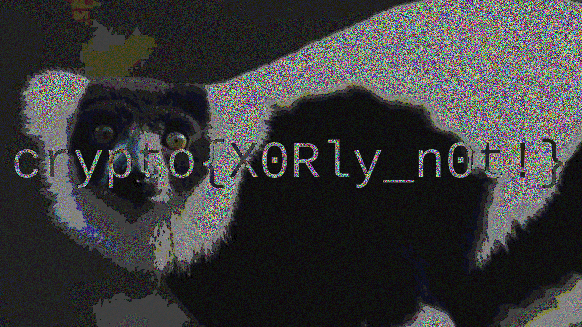

In [303]:
im3

In [304]:
data=im1.getdata()

In [305]:
type(data)

ImagingCore

In [307]:
data[0:7]

TypeError: sequence index must be integer, not 'slice'

In [313]:
np.bitwise_xor(np.array(im2),np.array(im1))[1]

array([[50, 50, 59],
       [50, 50, 59],
       [50, 50, 59],
       ...,
       [87, 83, 86],
       [87, 83, 86],
       [87, 83, 86]], dtype=uint8)

In [311]:
x.shape

(327, 582, 3)

That's it for `XOR`!. On to some math.

## Mathematics

## Greatest Common Divisor

The Greatest Common Divisor (GCD), sometimes known as the highest common factor, is the largest number which divides two positive integers (a,b).

For a = 12, b = 8 we can calculate the divisors of a: {1,2,3,4,6,12} and the divisors of b: {1,2,4,8}. Comparing these two, we see that gcd(a,b) = 4.

Now imagine we take a = 11, b = 17. Both a and b are prime numbers. As a prime number has only itself and 1 as divisors, gcd(a,b) = 1.

We say that for any two integers a,b, if gcd(a,b) = 1 then a and b are coprime integers.

If a and b are prime, they are also coprime. If a is prime and b < a then a and b are coprime.


There are many tools to calculate the GCD of two integers, but for this task we recommend looking up Euclid's Algorithm.

Try coding it up; it's only a couple of lines. Use a = 12, b = 8 to test it.

Now calculate gcd(a,b) for a = 66528, b = 52920 and enter it below. 

### Euclid's algorithm
WLOG assume $a<b$. The $b$ can be written as $b=q_0a+r_0$, where $q_0$ is the largest integer such that $q_0a\leq b$ and $0\leq r_0<a$ is the remainder. Then since $gcd(a,b)=gcd(a,r)$ we can just find the $gcd$ of the smaller pair of numbers $(a,r)$. We can proceed iteratively and since the remainders are always positive the process must terminate in a finite number of steps.

* $b=q_0a+r_0$
* $a=q_1r_0+r_1$
* $r_0=q_1r_1+r_2$
* ...
*$r_{n-2}=q_{n-1}r_{n-1}+r_{n}$
The process proceeds until $r_{n}=0$ for some value $n$. Then $r_{n-1}$ is the greatest common divisor of $a$ and $b$.

However, there is no sense in reinventing the wheel here so we'll simply use the `math` library in python.


In [315]:
math.gcd(66528,52920)

1512

On to the next problem!

## Extended GCD

Let a and b be positive integers.

The extended Euclidean algorithm is an efficient way to find integers u,v such that

$$a \cdot u + b \cdot v = gcd(a,b)$$

In [318]:
import sys
from typing import Tuple
sys.setrecursionlimit(1000000)  # long type, 32bit OS 4B, 64bit OS 8B (1bit for sign)

def egcd(a: int, b: int) -> Tuple[int, int, int]:
    """return (g, x, y) such that a*x + b*y = g = gcd(a, b)"""
    if a == 0:
        return (b, 0, 1)
    else:
        b_div_a, b_mod_a = divmod(b, a)
        g, x, y = egcd(b_mod_a, a)
        return (g, y - b_div_a * x, x)

def xgcd(a: int, b: int) -> Tuple[int, int, int]:
    """return (g, x, y) such that a*x + b*y = g = gcd(a, b)"""
    x0, x1, y0, y1 = 0, 1, 1, 0
    while a != 0:
        (q, a), b = divmod(b, a), a
        y0, y1 = y1, y0 - q * y1
        x0, x1 = x1, x0 - q * x1
    return b, x0, y0

In [321]:
xgcd(26513,32321)

(1, 10245, -8404)